In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('/Users/pbhagwat/DEV/CohortAnalysis/Cohort-Analysis/Data/Telco-Customer-Churn.csv')

In [18]:
pd.set_option('display.max_columns', 100)

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [111]:
df[df['customerID']=='9237-HQITU']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [12]:
df[['customerID','gender','Contract','PaymentMethod','MonthlyCharges','TotalCharges','tenure','Churn']].head()

,customerID,gender,Contract,PaymentMethod,MonthlyCharges,TotalCharges,tenure,Churn
0,7590-VHVEG,Female,Month-to-month,Electronic check,29.85,29.85,1,No
1,5575-GNVDE,Male,One year,Mailed check,56.95,1889.5,34,No
2,3668-QPYBK,Male,Month-to-month,Mailed check,53.85,108.15,2,Yes
3,7795-CFOCW,Male,One year,Bank transfer (automatic),42.30,1840.75,45,No
4,9237-HQITU,Female,Month-to-month,Electronic check,70.70,151.65,2,Yes


In [8]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [14]:
temp = pd.get_dummies( df[['gender', 'Contract','PaymentMethod', 'Churn' ]])

,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,0,1,0,0,0,0,1,0,1,0
1,0,1,0,1,0,0,0,0,1,1,0
2,0,1,1,0,0,0,0,0,1,0,1
3,0,1,0,1,0,1,0,0,0,1,0
4,1,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,0,0,0,1,1,0
7039,1,0,0,1,0,0,1,0,0,1,0
7040,1,0,1,0,0,0,0,1,0,1,0
7041,0,1,1,0,0,0,0,0,1,0,1


In [57]:
temp=temp[['gender_Female','Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','Churn_Yes']]

In [22]:
dummies = pd.get_dummies(
    df[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn' ]]
)

In [23]:
dummies.head()

,SeniorCitizen,tenure,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


In [24]:
dummies = dummies[['gender_Female', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check','Churn_Yes']]

In [59]:
data = dummies.join(df[['customerID','MonthlyCharges', 'TotalCharges','tenure']])
temp_data = temp.join(df[['customerID','MonthlyCharges', 'TotalCharges','tenure']])

In [60]:
data.set_index('customerID', inplace=True)
data['TotalCharges'] = data[['TotalCharges']].replace([' '], '0')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

temp_data.set_index('customerID', inplace=True)
temp_data['TotalCharges'] = temp_data[['TotalCharges']].replace([' '], '0')
temp_data['TotalCharges'] = pd.to_numeric(temp_data['TotalCharges'])

In [27]:
data.head()

,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,Churn_Yes,MonthlyCharges,TotalCharges,tenure
customerID,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,29.85,29.85,1
5575-GNVDE,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,56.95,1889.50,34
3668-QPYBK,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,53.85,108.15,2
7795-CFOCW,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,1,0,0,0,42.30,1840.75,45
9237-HQITU,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,70.70,151.65,2


In [29]:
from lifelines import CoxPHFitter 
from sklearn.model_selection import train_test_split

In [70]:
x_select = ['gender_Female', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check','MonthlyCharges', 'TotalCharges','tenure', 'Churn_Yes']
temp_x_select = ['gender_Female','Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','InternetService_DSL', 'InternetService_Fiber optic','MonthlyCharges', 'TotalCharges', 'tenure', 'Churn_Yes']

In [75]:
cph_train, cph_test = train_test_split(data[x_select], test_size=0.2)

In [76]:
cph = CoxPHFitter()
cph.fit(cph_train, 'tenure', 'Churn_Yes')

<lifelines.CoxPHFitter: fitted with 5634 total observations, 4126 right-censored observations>

In [77]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 5634 total observations, 4126 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn_Yes'
      baseline estimation = breslow
   number of observations = 5634
number of events observed = 1508
   partial log-likelihood = -9868.47
         time fit was run = 2020-09-27 19:14:21 UTC

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                       
gender_Female                             0.07       1.07       0.05            -0.04             0.17                 0.96                 1.18
Partner_Yes                              -0.15       0.86       0.06            -0.27            -0.03                 0.77                 0.97
Dependents_Yes                           -0.13       0.88       0.08            -0.28             0.02                 0.76                 1.02
PhoneService_Yes                          0.93       2.54       0.25             0.45             1.42                 1.57                 4.12
MultipleLines_Yes                         0.12       1.12       0.08            -0.04             0.27                 0.96                 1.31
InternetService_DSL                       2.43      11.38       0.33             1.78             3.08                 5.94                21.81
InternetService_Fiber optic               3.64      37.91       0.58             2.50             4.77                12.18               118.06
OnlineSecurity_Yes                       -0.13       0.87       0.09            -0.32             0.05                 0.73                 1.05
DeviceProtection_Yes                      0.07       1.08       0.08            -0.09             0.23                 0.92                 1.26
TechSupport_Yes                          -0.09       0.92       0.09            -0.27             0.09                 0.77                 1.10
StreamingTV_Yes                           0.34       1.40       0.12             0.09             0.58                 1.10                 1.78
StreamingMovies_Yes                       0.42       1.52       0.12             0.18             0.66                 1.19                 1.93
Contract_One year                        -1.23       0.29       0.11            -1.45            -1.02                 0.24                 0.36
Contract_Two year                        -3.87       0.02       0.23            -4.32            -3.43                 0.01                 0.03
PaperlessBilling_Yes                      0.11       1.12       0.06            -0.01             0.24                 0.99                 1.27
PaymentMethod_Bank transfer (automatic)  -0.55       0.58       0.10            -0.74            -0.36                 0.48                 0.70
PaymentMethod_Credit card (automatic)    -0.51       0.60       0.10            -0.70            -0.32                 0.50                 0.73
PaymentMethod_Electronic check           -0.16       0.85       0.08            -0.31            -0.01                 0.73                 0.99
MonthlyCharges                            0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
TotalCharges                             -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

                                             z      p   -log2(p)
covariate                                                       
gender_Female                             1.26   0.21       2.27
Partner_Yes                              -2.42   0.02       6.02
Dependents_Yes                           -1.75   0.08       3.64
PhoneService_Yes                          3.80 <0.005      12.76
MultipleLines_Yes                         1.47   0.

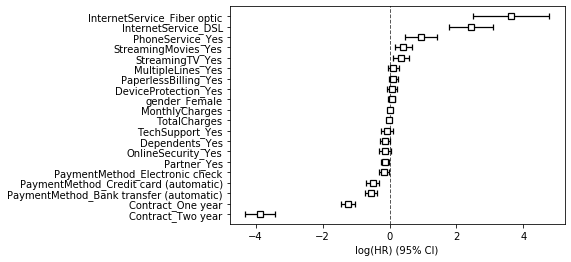

In [78]:
cph.plot()

Text(0.5, 0, 'tenure period')

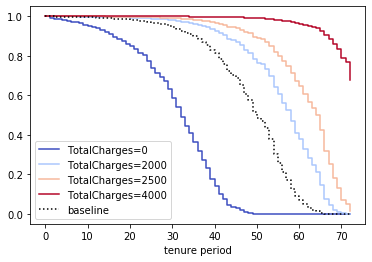

In [36]:
cph.plot_partial_effects_on_outcome('TotalCharges',values=[0,2000,2500,4000], cmap='coolwarm').set_xlabel('tenure period')

## Churn Prediction
### Next step is to derive some insights and to make predictions of the existing customer behaviour 

In [37]:
# censored observation is one which is yet to have an ‘event’, i.e. customers who are yet to churn.
censored_subjects = data.loc[data['Churn_Yes']==0] 
print("Number of customers yet to churn:", len(censored_subjects))

Number of customers yet to churn: 5174


In [38]:
# predict_survival_function() creates the matrix containing a survival probability for each remaining customers 
#'unconditioned' survival function 'cuz some of these curves will predict churn before the customer's current tenure time
# row index => tenure period; column_index is the data index where Churn_Yes=0
unconditioned_sf = cph.predict_survival_function(censored_subjects)

In [39]:
unconditioned_sf.head()

,7590-VHVEG,5575-GNVDE,7795-CFOCW,1452-KIOVK,6713-OKOMC,6388-TABGU,9763-GRSKD,7469-LKBCI,8091-TTVAX,5129-JLPIS,3655-SNQYZ,8191-XWSZG,9959-WOFKT,4183-MYFRB,1680-VDCWW,3638-WEABW,6322-HRPFA,6865-JZNKO,5248-YGIJN,3841-NFECX,4929-XIHVW,6827-IEAUQ,7310-EGVHZ,3413-BMNZE,6234-RAAPL,6572-ADKRS,8865-TNMNX,9489-DEDVP,9867-JCZSP,4671-VJLCL,4080-IIARD,3714-NTNFO,5948-UJZLF,7639-LIAYI,2954-PIBKO,8012-SOUDQ,6575-SUVOI,4667-QONEA,8769-KKTPH,5067-XJQFU,3957-SQXML,5954-BDFSG,0434-CSFON,1215-FIGMP,0526-SXDJP,0557-ASKVU,5122-CYFXA,8627-ZYGSZ,3410-YOQBQ,3170-NMYVV,...,1904-WAJAA,5130-YPIRV,2843-CQMEG,6439-PKTRR,5351-QESIO,5568-DMXZS,8468-FZTOE,6633-SYEUS,6447-GORXK,6967-PEJLL,5981-ZVXOT,1684-FLBGS,1389-WNUIB,0376-OIWME,0218-QNVAS,0804-YGEQV,7164-BPTUT,2523-EWWZL,0928-XUTSN,0052-YNYOT,9586-JGQKH,4501-VCPFK,6075-SLNIL,9347-AERRL,2274-XUATA,6691-CCIHA,1685-BQULA,9053-EJUNL,0666-UXTJO,1471-GIQKQ,4807-IZYOZ,9710-NJERN,9837-FWLCH,7203-OYKCT,1035-IPQPU,7398-LXGYX,2823-LKABH,0550-DCXLH,9281-CEDRU,2235-DWLJU,0871-OPBXW,3605-JISKB,9767-FFLEM,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,3186-AJIEK
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1.0,0.972233,0.998671,0.999704,0.981687,0.982879,0.999947,0.974100,0.999944,0.999982,0.987951,1.0,0.999693,1.0,0.960754,0.999448,0.999992,0.999706,0.994546,1.0,1.0,0.657411,0.998892,0.996955,0.945002,1.0,0.998994,0.989807,0.999999,0.999394,0.999998,0.972337,0.998556,0.919162,0.999995,0.999998,0.998366,0.995226,0.999983,0.999995,0.999997,0.999979,1.0,0.999443,0.999924,0.999996,0.996371,0.836249,0.999671,0.999836,0.999982,...,0.999779,0.999997,0.984506,1.000000,0.973104,0.933034,0.999999,0.988630,0.995358,0.999401,0.999118,0.993673,0.997354,0.997170,0.999998,0.999799,0.999998,0.987510,0.874413,0.999829,1.000000,0.993698,0.998577,0.999681,0.999999,0.999998,0.998569,0.997934,0.996576,0.912394,0.999979,0.999954,0.997382,0.999998,0.999968,0.999336,0.959732,0.950289,0.999998,0.947068,0.994378,0.999934,0.996355,0.963394,0.992119,0.999987,0.997427,0.999999,0.987471,1.000000
2.0,0.958663,0.998009,0.999556,0.972673,0.974443,0.999921,0.961424,0.999916,0.999973,0.981992,1.0,0.999540,1.0,0.941746,0.999173,0.999989,0.999559,0.991834,1.0,1.0,0.533228,0.998339,0.995439,0.918694,1.0,0.998492,0.984759,0.999999,0.999091,0.999998,0.958817,0.997836,0.881292,0.999992,0.999997,0.997551,0.992851,0.999974,0.999992,0.999995,0.999969,1.0,0.999165,0.999886,0.999993,0.994564,0.764840,0.999507,0.999754,0.999973,...,0.999669,0.999996,0.976863,0.999999,0.959952,0.901306,0.999999,0.983004,0.993048,0.999102,0.998678,0.990531,0.996036,0.995761,0.999998,0.999699,0.999996,0.981334,0.817759,0.999744,0.999999,0.990568,0.997867,0.999522,0.999999,0.999997,0.997856,0.996905,0.994872,0.871581,0.999968,0.999931,0.996078,0.999997,0.999951,0.999005,0.940243,0.926409,0.999996,0.921706,0.991584,0.999902,0.994540,0.945628,0.988209,0.999981,0.996146,0.999998,0.981277,1.000000
3.0,0.946826,0.997424,0.999426,0.964773,0.967046,0.999897,0.950357,0.999892,0.999965,0.976754,1.0,0.999404,1.0,0.925256,0.998930,0.999985,0.999429,0.989444,1.0,1.0,0.443140,0.997850,0.994100,0.896048,1.0,0.998049,0.980317,0.999998,0.998824,0.999997,0.947022,0.9

In [40]:
# We've to condition the prediction on the basis that the customers were still with us when the data was collected
# c.name => row number(index) of the data where Churn_Yes=0
# data.loc[c.name, 'tenure'] => tenure value of specific index(c.name) in original data
# c.loc[data.loc[c.name, 'tenure']]<=1 always in unconditioned_cf, which may not be true cuz the customers might continue using the platform even after the date of collection of data
conditioned_sf = unconditioned_sf.apply(lambda c:(c/c.loc[data.loc[c.name, 'tenure']]).clip(upper=1))

In [41]:
conditioned_sf.head()

,7590-VHVEG,5575-GNVDE,7795-CFOCW,1452-KIOVK,6713-OKOMC,6388-TABGU,9763-GRSKD,7469-LKBCI,8091-TTVAX,5129-JLPIS,3655-SNQYZ,8191-XWSZG,9959-WOFKT,4183-MYFRB,1680-VDCWW,3638-WEABW,6322-HRPFA,6865-JZNKO,5248-YGIJN,3841-NFECX,4929-XIHVW,6827-IEAUQ,7310-EGVHZ,3413-BMNZE,6234-RAAPL,6572-ADKRS,8865-TNMNX,9489-DEDVP,9867-JCZSP,4671-VJLCL,4080-IIARD,3714-NTNFO,5948-UJZLF,7639-LIAYI,2954-PIBKO,8012-SOUDQ,6575-SUVOI,4667-QONEA,8769-KKTPH,5067-XJQFU,3957-SQXML,5954-BDFSG,0434-CSFON,1215-FIGMP,0526-SXDJP,0557-ASKVU,5122-CYFXA,8627-ZYGSZ,3410-YOQBQ,3170-NMYVV,...,1904-WAJAA,5130-YPIRV,2843-CQMEG,6439-PKTRR,5351-QESIO,5568-DMXZS,8468-FZTOE,6633-SYEUS,6447-GORXK,6967-PEJLL,5981-ZVXOT,1684-FLBGS,1389-WNUIB,0376-OIWME,0218-QNVAS,0804-YGEQV,7164-BPTUT,2523-EWWZL,0928-XUTSN,0052-YNYOT,9586-JGQKH,4501-VCPFK,6075-SLNIL,9347-AERRL,2274-XUATA,6691-CCIHA,1685-BQULA,9053-EJUNL,0666-UXTJO,1471-GIQKQ,4807-IZYOZ,9710-NJERN,9837-FWLCH,7203-OYKCT,1035-IPQPU,7398-LXGYX,2823-LKABH,0550-DCXLH,9281-CEDRU,2235-DWLJU,0871-OPBXW,3605-JISKB,9767-FFLEM,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,3186-AJIEK
0.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2.0,0.986043,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.998479,0.972160,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.986484,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.955269,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3.0,0.973868,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.831051,1.0,0.997136,0.948197,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.963492,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.974688,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.917398,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.997516,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4.0,0.960331,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.674649,1.0,0.995626,0.921906,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.923956,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.914944,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.961568,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.876527,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.994724,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [42]:
import matplotlib.pyplot as plt

In [43]:
customer = '1452-KIOVK'

In [44]:
df.loc[df['customerID'] == customer]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No


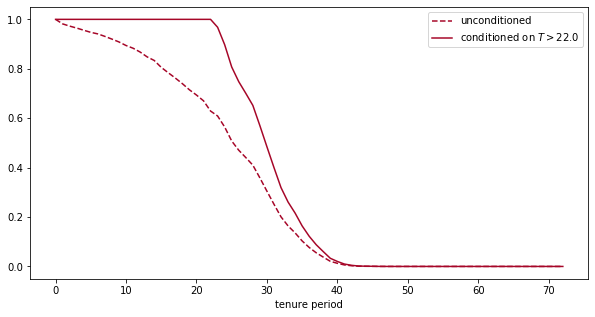

In [46]:
# investigate individual customers and see how the conditioning has affected their survival over the base line
plt.figure(figsize=(10, 5))
subject = customer
unconditioned_sf[subject].plot(ls="--", color="#A60628", label="unconditioned") 
conditioned_sf[subject].plot(color="#A60628", label=("conditioned on $T>%s$" % data.loc[subject]['tenure'])) # T>34 indicate that the customer is active even after 58 months
plt.xlabel('tenure period')
plt.legend()

### Getting actionable insights out of the model

In [47]:
from lifelines.utils import median_survival_times, qth_survival_times

In [79]:
# Predict the month number where the survival chance of customer is 50%
# This can also be modified as predictions_50 = qth_survival_times(.50, conditioned_sf), where the percentile can be modified depending on our requirement 
percentile = 0.5
predictions_50 = qth_survival_times(percentile, conditioned_sf)
# predictions_10 = qth_survival_times(.10, conditioned_sf) #This provides the month where survival chance of customer is 10%

In [80]:
predictions_50

,7590-VHVEG,5575-GNVDE,7795-CFOCW,1452-KIOVK,6713-OKOMC,6388-TABGU,9763-GRSKD,7469-LKBCI,8091-TTVAX,5129-JLPIS,3655-SNQYZ,8191-XWSZG,9959-WOFKT,4183-MYFRB,1680-VDCWW,3638-WEABW,6322-HRPFA,6865-JZNKO,5248-YGIJN,3841-NFECX,4929-XIHVW,6827-IEAUQ,7310-EGVHZ,3413-BMNZE,6234-RAAPL,6572-ADKRS,8865-TNMNX,9489-DEDVP,9867-JCZSP,4671-VJLCL,4080-IIARD,3714-NTNFO,5948-UJZLF,7639-LIAYI,2954-PIBKO,8012-SOUDQ,6575-SUVOI,4667-QONEA,8769-KKTPH,5067-XJQFU,3957-SQXML,5954-BDFSG,0434-CSFON,1215-FIGMP,0526-SXDJP,0557-ASKVU,5122-CYFXA,8627-ZYGSZ,3410-YOQBQ,3170-NMYVV,...,1904-WAJAA,5130-YPIRV,2843-CQMEG,6439-PKTRR,5351-QESIO,5568-DMXZS,8468-FZTOE,6633-SYEUS,6447-GORXK,6967-PEJLL,5981-ZVXOT,1684-FLBGS,1389-WNUIB,0376-OIWME,0218-QNVAS,0804-YGEQV,7164-BPTUT,2523-EWWZL,0928-XUTSN,0052-YNYOT,9586-JGQKH,4501-VCPFK,6075-SLNIL,9347-AERRL,2274-XUATA,6691-CCIHA,1685-BQULA,9053-EJUNL,0666-UXTJO,1471-GIQKQ,4807-IZYOZ,9710-NJERN,9837-FWLCH,7203-OYKCT,1035-IPQPU,7398-LXGYX,2823-LKABH,0550-DCXLH,9281-CEDRU,2235-DWLJU,0871-OPBXW,3605-JISKB,9767-FFLEM,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,3186-AJIEK
0.5,23.0,49.0,60.0,30.0,28.0,70.0,25.0,69.0,inf,33.0,inf,61.0,inf,26.0,54.0,inf,61.0,39.0,inf,inf,6.0,49.0,40.0,17.0,inf,54.0,31.0,inf,54.0,inf,25.0,54.0,14.0,inf,inf,50.0,39.0,inf,inf,inf,inf,inf,57.0,69.0,inf,39.0,10.0,59.0,63.0,inf,...,61.0,inf,32.0,inf,23.0,17.0,inf,33.0,40.0,54.0,52.0,36.0,42.0,44.0,inf,62.0,inf,34.0,17.0,69.0,inf,37.0,49.0,58.0,inf,inf,49.0,48.0,42.0,13.0,inf,70.0,41.0,inf,72.0,55.0,25.0,22.0,inf,18.0,36.0,69.0,43.0,26.0,33.0,inf,42.0,inf,30.0,inf


In [81]:
predictions_50[[customer]]

,1452-KIOVK
0.5,30.0


In [82]:
# Investigate the predicted remeaining value that a customer has for the business 
values = predictions_50.T.join(data[['MonthlyCharges','tenure']])
values['RemainingValue'] = values['MonthlyCharges'] * (values[0.5] - values['tenure']) # With this we can predict which customers might inflict the highest damage to the business

In [83]:
values.loc[[customer]]

,0.5,MonthlyCharges,tenure,RemainingValue
1452-KIOVK,30.0,89.1,22,712.8


## Churn prevention - What can we do to keep them?

In [73]:
# Through coefficient chart we concluded that these 4 features i.e. Contract_Two year, Contract_One year, PaymentMethod_Credit card (automatic), PaymentMethod_Bank transfer (automatic)
# promotes the survival chances positively, so let's focus on those i.e reverse the existing values and see the resulting survival chances

upgrades = ['PaymentMethod_Credit card (automatic)', 'PaymentMethod_Bank transfer (automatic)', 'Contract_One year', 'Contract_Two year']
results_dict = {}

# Run this for all the customers 
actual = data.loc[[customer]]
change = data.loc[[customer]]
results_dict[customer] = [cph.predict_median(actual)]
for upgrade in upgrades:
    change[upgrade] = 1 if list(change[upgrade]) == [0] else 0
    results_dict[customer].append(cph.predict_median(change))
    change[upgrade] = 1 if list(change[upgrade]) == [0] else 0

In [74]:
results_dict

{'1452-KIOVK': [27.0, 22.0, 31.0, 38.0, 57.0]}

In [75]:
result_df = pd.DataFrame(results_dict).T
result_df.columns = ['baseline'] + upgrades
actions = values.join(result_df).drop([0.5], axis=1)

In [76]:
data.loc[[customer],upgrades]

,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year
customerID,,,,
1452-KIOVK,1,0,0,0


In [77]:
# Notice that if we get the 1st customer to use CC we increase the survival period of cust '5575-GNVDE' by 5 months i.e. 46(baseline) -> 51(PaymentMethod_Credit card (automatic)) and so on..
# Note: Cust 5575-GNVDE was already having Contract_One year, after reverting it we can see that the survival chances goes down from 46 to 37
actions.loc[[customer]]

,MonthlyCharges,tenure,RemainingValue,baseline,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year
1452-KIOVK,89.1,22,801.9,27.0,22.0,31.0,38.0,57.0


##### Calculate what impact it has financially 

In [78]:
actions['CreditCard Diff'] = (actions['PaymentMethod_Credit card (automatic)'] - actions['baseline']) * actions['MonthlyCharges'] 
actions['BankTransfer Diff'] = (actions['PaymentMethod_Bank transfer (automatic)'] - actions['baseline']) * actions['MonthlyCharges']
actions['1yrContract Diff'] = (actions['Contract_One year'] - actions['baseline']) * actions['MonthlyCharges']
actions['2yrContract Diff'] = (actions['Contract_Two year'] - actions['baseline']) * actions['MonthlyCharges']

In [79]:
actions.loc[[customer]]

,MonthlyCharges,tenure,RemainingValue,baseline,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year,CreditCard Diff,BankTransfer Diff,1yrContract Diff,2yrContract Diff
1452-KIOVK,89.1,22,801.9,27.0,22.0,31.0,38.0,57.0,-445.5,356.4,980.1,2673.0


### Accuracy and Calibration
#### Calibration is the propensity of the model to get probabilities right over time (i.e. having high recall value)

In [80]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
import numpy as np

In [81]:
cph_test.head()

,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,MonthlyCharges,TotalCharges,tenure,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,,
5371-VYLSX,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,83.40,4113.70,50,0
4323-OHFOW,1,1,0,1,1,0,1,0,0,1,1,1,1,0,1,1,0,0,105.55,7195.35,70,0
8466-PZBLH,0,1,1,1,1,0,1,1,0,1,1,1,0,1,0,1,0,0,104.60,6885.75,67,0
1842-EZJMK,0,1,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,1,103.70,5071.05,50,1
0947-MUGVO,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,73.65,1463.50,20,1


Text(0.5, 1.0, 'Calibration plots (reliability curve)')

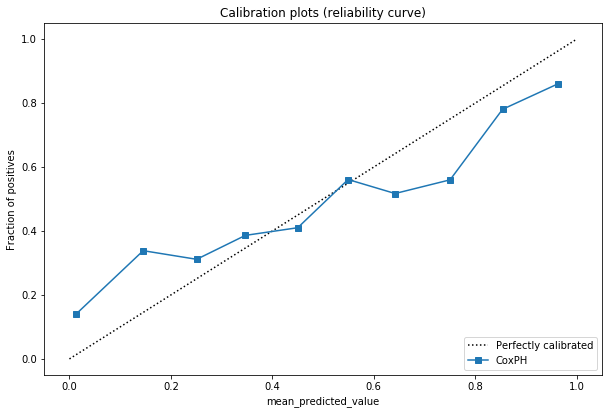

In [89]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2) 
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated") 

probs = 1-np.array(cph.predict_survival_function(cph_test).loc[13]) # here tenure=13

actual = cph_test['Churn_Yes']

fraction_of_positives, mean_predicted_value = calibration_curve(actual, probs, n_bins=10, normalize=False) 

ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % ("CoxPH"))

ax1.set_ylabel("Fraction of positives") 
ax1.set_ylim([-0.05, 1.05]) 
ax1.set_xlabel("mean_predicted_value") 
ax1.legend(loc="lower right") 
ax1.set_title('Calibration plots (reliability curve)')

In [83]:
# To understand how far away the line is from the perfect calibration we use brier_score_loss
brier_score_loss(cph_test['Churn_Yes'], 1-np.array(cph.predict_survival_function(cph_test).loc[13]), pos_label=1)

0.15965600051810114

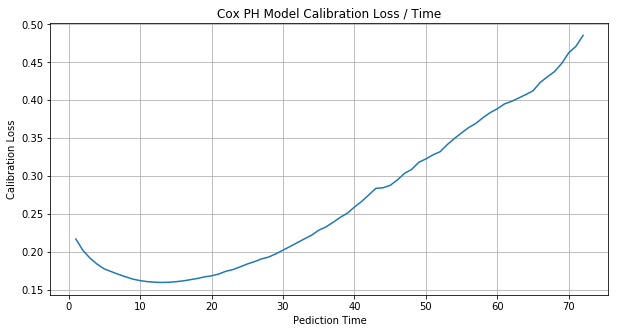

In [86]:
# Inspect the calibration of the model at all the time periods (above one is just for tenure=13)
loss_dict = {}
for i in range(1,73):
    score=brier_score_loss(cph_test['Churn_Yes'], 1-np.array(cph.predict_survival_function(cph_test).loc[i]), pos_label=1)
    loss_dict[i] = [score]
    
loss_df = pd.DataFrame(loss_dict).T

fig,ax = plt.subplots(figsize=(10, 5))
ax.plot(loss_df.index, loss_df)
ax.set(xlabel='Pediction Time', ylabel='Calibration Loss', title='Cox PH Model Calibration Loss / Time')
ax.grid()

# Here we can see that the model is well caliberated b/w 5 and 25 months
plt.show() 

In [87]:
# upper and lower bounds for the expected return on investment from getting customers to make changes
loss_df.columns = ['loss'] 

temp_df = actions.reset_index().set_index('PaymentMethod_Credit card (automatic)').join(loss_df) 
temp_df = temp_df.set_index('index') 
actions['CreditCard Lower'] = temp_df['CreditCard Diff'] - (temp_df['loss'] * temp_df['CreditCard Diff']) 
actions['CreditCard Upper'] = temp_df['CreditCard Diff'] + (temp_df['loss'] * temp_df['CreditCard Diff']) 

temp_df = actions.reset_index().set_index('PaymentMethod_Bank transfer (automatic)').join(loss_df) 
temp_df = temp_df.set_index('index') 
actions['BankTransfer Lower'] = temp_df['BankTransfer Diff'] - (.5 * temp_df['loss'] * temp_df['BankTransfer Diff']) 
actions['BankTransfer Upper'] = temp_df['BankTransfer Diff'] + (.5 * temp_df['loss'] * temp_df['BankTransfer Diff']) 

temp_df = actions.reset_index().set_index('Contract_One year').join(loss_df) 
temp_df = temp_df.set_index('index') 
actions['1yrContract Lower'] = temp_df['1yrContract Diff'] - (.5 * temp_df['loss'] * temp_df['1yrContract Diff']) 
actions['1yrContract Upper'] = temp_df['1yrContract Diff'] + (.5 * temp_df['loss'] * temp_df['1yrContract Diff']) 

temp_df = actions.reset_index().set_index('Contract_Two year').join(loss_df) 
temp_df = temp_df.set_index('index') 
actions['2yrContract Lower'] = temp_df['2yrContract Diff'] - (.5 * temp_df['loss'] * temp_df['2yrContract Diff']) 
actions['2yrContract Upper'] = temp_df['2yrContract Diff'] + (.5 * temp_df['loss'] * temp_df['2yrContract Diff'])

In [88]:
actions.loc[[customer]]

,MonthlyCharges,tenure,RemainingValue,baseline,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year,CreditCard Diff,BankTransfer Diff,1yrContract Diff,2yrContract Diff,CreditCard Lower,CreditCard Upper,BankTransfer Lower,BankTransfer Upper,1yrContract Lower,1yrContract Upper,2yrContract Lower,2yrContract Upper
1452-KIOVK,89.1,22,801.9,27.0,22.0,31.0,38.0,57.0,-445.5,356.4,980.1,2673.0,-367.808931,-523.191069,319.496424,393.303576,859.81699,1100.38301,2179.062188,3166.937812


In [100]:
import streamlit as st